# 🎓 Student Performance Prediction
**Author:** Shahid Hussain  
**Objective:** Predict student performance using various features such as study time, failures, absences, and more. 

This notebook walks through:
- Data loading and cleaning
- Exploratory Data Analysis (EDA)
- Feature engineering
- Model training & evaluation
- Insights and conclusions

---

# Libraries

# 📥 Data Loading and Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

In [2]:
df= pd.read_csv("exams.csv")

# Data Cleaning and Visualization

# 📊 Exploratory Data Analysis (EDA)

In [3]:
# One-hot encode 'race/ethnicity'
encoded_race = pd.get_dummies(df['race/ethnicity'], drop_first=True)

# One-hot encode 'parental level of education'
encoded_education = pd.get_dummies(df['parental level of education'], drop_first=True)

# Concatenate the one-hot encoded columns with the original DataFrame
df= pd.concat([df, encoded_race, encoded_education], axis=1)

# Drop the original 'race/ethnicity' and 'parental level of education' columns
df = df.drop(['race/ethnicity', 'parental level of education'], axis=1)


# Display the first few rows of the final DataFrame
display(df.head())

,gender,lunch,test preparation course,math score,reading score,writing score,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school
0,female,standard,completed,59,70,78,False,False,True,False,False,False,False,True,False
1,male,standard,none,96,93,87,False,False,True,False,False,False,False,False,False
2,female,free/reduced,none,57,76,77,False,False,True,False,False,False,False,True,False
3,male,free/reduced,none,70,70,63,True,False,False,False,False,False,False,True,False
4,female,standard,none,83,85,86,False,False,True,False,False,False,False,False,False


In [4]:
X = df.drop(['math score','reading score','writing score'],axis=1)
y = df.iloc[:,[3,4,5]]

# average of math,reading and writing score
y = y.mean(axis=1)

# replace math,reading and writing score with average score(y)
df = df.drop(['math score','reading score','writing score'],axis=1)
df = pd.concat([df,y],axis=1)
df.rename(columns={0:'average score'},inplace=True)
df.head()

,gender,lunch,test preparation course,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,average score
0,female,standard,completed,False,False,True,False,False,False,False,True,False,69.000000
1,male,standard,none,False,False,True,False,False,False,False,False,False,92.000000
2,female,free/reduced,none,False,False,True,False,False,False,False,True,False,70.000000
3,male,free/reduced,none,True,False,False,False,False,False,False,True,False,67.666667
4,female,standard,none,False,False,True,False,False,False,False,False,False,84.666667


In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
categorical_features = ['gender', 'lunch', 'test preparation course']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Splitting data into Train and Test

# 🧠 Model Training

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modeling

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print("Predicted vs Actual:\n", np.concatenate((y_pred.reshape(-1,1), y_test.values.reshape(-1,1)), axis=1))

Predicted vs Actual:
 [[ 66.66  79.  ]
 [ 69.92  81.33]
 [ 67.26  49.  ]
 [ 56.75  48.  ]
 [ 66.45  70.33]
 [ 65.69  64.67]
 [ 66.66  65.  ]
 [ 72.    81.  ]
 [ 58.48  58.  ]
 [ 58.94  76.33]
 [ 81.32  87.33]
 [ 74.62  82.33]
 [ 72.65  70.33]
 [ 58.94  55.33]
 [ 70.71  73.33]
 [ 68.48  62.33]
 [ 69.49  68.33]
 [ 69.14  69.  ]
 [ 67.65  53.67]
 [ 67.61  58.33]
 [ 64.63  74.33]
 [ 56.75  51.33]
 [ 75.13  81.  ]
 [ 56.1   49.33]
 [ 68.17  72.  ]
 [ 69.34  63.67]
 [ 67.63  66.33]
 [ 60.44  53.67]
 [ 66.45  77.33]
 [ 71.15  92.  ]
 [ 77.33  73.67]
 [ 66.45  54.  ]
 [ 70.4   67.33]
 [ 71.9   84.33]
 [ 72.53  90.33]
 [ 67.61  49.67]
 [ 56.43  46.33]
 [ 56.43  75.  ]
 [ 60.33  81.33]
 [ 65.2   73.33]
 [ 58.94  59.67]
 [ 67.61  70.67]
 [ 65.5   69.  ]
 [ 81.32  55.33]
 [ 54.43  74.  ]
 [ 59.51  82.  ]
 [ 77.94  73.  ]
 [ 67.13  64.  ]
 [ 57.73  58.33]
 [ 53.25  57.33]
 [ 71.15  69.  ]
 [ 58.74  51.67]
 [ 55.08  48.33]
 [ 69.1   70.33]
 [ 71.9   58.67]
 [ 65.29  70.67]
 [ 70.64  79.  ]
 [ 68.48 

# 📈 Model Evaluation and Results

In [11]:
# Evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

print("\nEvaluation Metrics:")
print("R² Score        :", r2_score(y_test, y_pred))
print("MAE (error)     :", mean_absolute_error(y_test, y_pred))
print("RMSE (error)    :", mean_squared_error(y_test, y_pred))

# Cross-validated R²
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(regressor, X_poly, y, cv=5, scoring='r2')
print("Cross-Validated R²:", cv_scores.mean())


Evaluation Metrics:
R² Score        : 0.23034840912599952
MAE (error)     : 10.356609264532644
RMSE (error)    : 162.89792223755285
Cross-Validated R²: 0.1710616243282903


In [12]:
# 🔁 Cross-validation Score
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print('Cross-validated R² scores:', cv_scores)
print('Average R²:', np.mean(cv_scores))

Cross-validated R² scores: [0.08 0.23 0.28 0.26 0.28]
Average R²: 0.2247608429617054


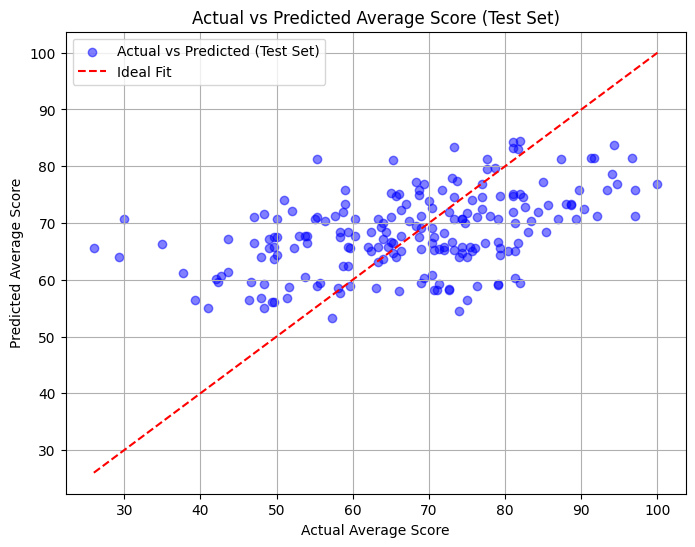

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Actual vs Predicted (Test Set)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title("Actual vs Predicted Average Score (Test Set)")
plt.xlabel("Actual Average Score")
plt.ylabel("Predicted Average Score")
plt.legend()
plt.grid(True)
plt.show()

# ✅ Final Thoughts
- The model provides a good starting point for understanding student performance.
- Feature importance can be visualized to identify key drivers.
- Further tuning and cross-validation can improve accuracy.

**Thanks for reading! 📘**